In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/data/data_for_henry_2024.csv")
data

In [ ]:
# Extract the relevant columns for PCA (columns L to CH, which are the fish ASVs)
fish_asvs = data.iloc[:, 11:]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fish_asvs)

# Add PCA results to the dataframe
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# color by date
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PCA1', y='PCA2', data=data, hue='date', s=100, palette='tab10')
# plt.title('PCA of Fish ASVs colored by date')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=data, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
# for i, station in enumerate(data['station']):
#     plt.annotate(station, (data['PCA1'].iloc[i], data['PCA2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('PCA of Fish ASVs colored by date')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Outlier station 6

Station 6 is an outlier across both plots. Appears to be much more similar to data in the summer
NorSeaRob 0.028368794
Am_butterfish 0.822695035
FourSpot Flounder 0.14893617

In [ ]:
data
selected_columns = data[['PCA1', 'PCA2', 'date']]
selected_columns.to_csv('pca_latent_space.csv', index=False)


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=30, perplexity=20, learning_rate=10, n_iter=1000) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
# Perform t-SNE

# Add t-SNE results to the dataframe
data['tSNE1'] = tsne_result[:, 0]
data['tSNE2'] = tsne_result[:, 1]

# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='tSNE1', y='tSNE2', data=data, hue='date', s=100, palette='tab10')
# plt.title('t-SNE of Fish ASVs colored by Date')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=data, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
# for i, station in enumerate(data['station']):
#     plt.annotate(station, (data['tSNE1'].iloc[i], data['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('tSNE of Fish ASVs colored by date')
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [ ]:
data
selected_columns = data[['tSNE1', 'tSNE2', 'date']]
selected_columns.to_csv('tsne_latent_space.csv', index=False)


In [ ]:
# Extract species columns
columns_to_remove = ['PCA1', 'PCA2', 'tSNE1', 'tSNE2']
save_data = data.drop(columns=columns_to_remove, errors='ignore')

species_columns = save_data.columns[data.columns.get_loc("primers") + 1:]

# Convert relative abundance to presence/absence (1 if > 0, else 0)
Data_presence = save_data[species_columns].applymap(lambda x: 1 if x > 0 else 0)

# Export presence/absence data
Data_presence.to_csv("presence_absence_data.csv", index=False)


## PCA Seasonal Analysis

In [ ]:

#Winter
winter_data = data.loc[data['sampling_bout']=='Feb_24']
winter_fish_asvs = winter_data.iloc[:, 11:]
winter_pca = PCA(n_components=2)
winter_pca_result = winter_pca.fit_transform(winter_fish_asvs)
winter_data['PCA1'] = winter_pca_result[:, 0]
winter_data['PCA2'] = winter_pca_result[:, 1]

spring_data = data.loc[data['sampling_bout']=='Jun_23']
spring_fish_asvs = spring_data.iloc[:, 11:]
spring_pca = PCA(n_components=2)
spring_pca_result = spring_pca.fit_transform(spring_fish_asvs)
spring_data['PCA1'] = spring_pca_result[:, 0]
spring_data['PCA2'] = spring_pca_result[:, 1]

summer_data = data.loc[data['sampling_bout']=='Aug_23']
summer_fish_asvs = summer_data.iloc[:, 11:]
summer_pca = PCA(n_components=2)
summer_pca_result = summer_pca.fit_transform(summer_fish_asvs)
summer_data['PCA1'] = summer_pca_result[:, 0]
summer_data['PCA2'] = summer_pca_result[:, 1]



In [23]:
winter_data

,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,primers,...,Catfish_sp,White_perch,Whitefish_Cor,Pac_sand_lance,White_catfish,Atl_salmon,PCA1,PCA2,tSNE1,tSNE2
0,NJOT_Feb_24_2,NJOT,2/1/24,Feb_24,edna,Trawl,2,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.010394,0.021395,14.296594,0.504600
1,NJOT_Feb_24_3,NJOT,2/1/24,Feb_24,edna,Trawl,3,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000184,-0.040911,14.784911,0.676527
2,NJOT_Feb_24_4,NJOT,2/1/24,Feb_24,edna,Trawl,4,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.119631,0.130044,14.017278,-0.422469
3,NJOT_Feb_24_5,NJOT,2/1/24,Feb_24,edna,Trawl,5,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,0.074576,-0.227683,13.844262,2.212452
4,NJOT_Feb_24_6,NJOT,2/1/24,Feb_24,edna,Trawl,6,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,1.128401,0.250042,12.928527,2.641557
5,NJOT_Feb_24_7,NJOT,2/1/24,Feb_24,edna,Trawl,7,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,0.137906,-0.172317,13.781954,2.104628
6,NJOT_Feb_24_8,NJOT,2/1/24,Feb_24,edna,Trawl,8,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.044814,0.085655,14.791371,0.001430
7,NJOT_Feb_24_9,NJOT,2/1/24,Feb_24,edna,Trawl,9,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.054015,-0.032848,13.973993,0.467754
8,NJOT_Feb_24_10,NJOT,2/1/24,Feb_24,edna,Trawl,10,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.176790,0.167834,14.264357,-0.886105
9,NJOT_Feb_24_11,NJOT,2/1/24,Feb_24,edna,Trawl,11,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.228595,0.193752,13.841383,-1.039652


In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=winter_data, s=100, palette='tab10')

# Annotate points with station numbers
# for i, station in enumerate(data['station']):
#     plt.annotate(station, (data['tSNE1'].iloc[i], data['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('PCA of Winter Fish ASVs')
plt.xlabel('PCA Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=spring_data, s=100, palette='tab10')

# Annotate points with station numbers
# for i, station in enumerate(data['station']):
#     plt.annotate(station, (data['tSNE1'].iloc[i], data['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('PCA of Spring Fish ASVs')
plt.xlabel('PCA Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=summer_data, s=100, palette='tab10')

# Annotate points with station numbers
# for i, station in enumerate(data['station']):
#     plt.annotate(station, (data['tSNE1'].iloc[i], data['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

plt.title('PCA of Summer Fish ASVs')
plt.xlabel('PCA Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Save data
winter_data
w_selected_columns = winter_data[['PCA1', 'PCA2', 'date']]
w_selected_columns.to_csv('winter_pca_latent_space.csv', index=False)

spring_data
sp_selected_columns = spring_data[['PCA1', 'PCA2', 'date']]
sp_selected_columns.to_csv('spring_pca_latent_space.csv', index=False)

summer_data
su_selected_columns = summer_data[['PCA1', 'PCA2', 'date']]
su_selected_columns.to_csv('summer_pca_latent_space.csv', index=False)


## tSNE Seasonal Analysis

In [31]:
winter_tsne = TSNE(n_components=2, random_state=30, perplexity=5, learning_rate=10, n_iter=1000) #test with diff perplexity
winter_tsne_result = winter_tsne.fit_transform(winter_fish_asvs)
# Perform t-SNE
winter_data['tSNE1'] = winter_tsne_result[:, 0]
winter_data['tSNE2'] = winter_tsne_result[:, 1]
winter_data

spring_tsne = TSNE(n_components=2, random_state=30, perplexity=5, learning_rate=10, n_iter=1000) #test with diff perplexity
spring_tsne_result = spring_tsne.fit_transform(spring_fish_asvs)
# Perform t-SNE
spring_data['tSNE1'] = spring_tsne_result[:, 0]
spring_data['tSNE2'] = spring_tsne_result[:, 1]
spring_data

summer_tsne = TSNE(n_components=2, random_state=30, perplexity=5, learning_rate=10, n_iter=1000) #test with diff perplexity
summer_tsne_result = summer_tsne.fit_transform(summer_fish_asvs)
# Perform t-SNE
summer_data['tSNE1'] = summer_tsne_result[:, 0]
summer_data['tSNE2'] = summer_tsne_result[:, 1]
summer_data


/var/folders/ns/nv0myc8145dctt38_60qt7gm0000gp/T/ipykernel_40598/312609619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_data['tSNE1'] = winter_tsne_result[:, 0]
/var/folders/ns/nv0myc8145dctt38_60qt7gm0000gp/T/ipykernel_40598/312609619.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_data['tSNE2'] = winter_tsne_result[:, 1]
/var/folders/ns/nv0myc8145dctt38_60qt7gm0000gp/T/ipykernel_40598/312609619.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,station_id,project,date,sampling_bout,gear,sample_grp,station,location,replicate,primers,...,Catfish_sp,White_perch,Whitefish_Cor,Pac_sand_lance,White_catfish,Atl_salmon,PCA1,PCA2,tSNE1,tSNE2
59,NJOT_Aug_23_71,NJOT,8/1/23,Aug_23,edna,Trawl,71,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.334892,0.374482,7.860015,-23.507004
60,NJOT_Aug_23_72,NJOT,8/1/23,Aug_23,edna,Trawl,72,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.008379,-0.059126,3.342213,-3.852206
61,NJOT_Aug_23_73,NJOT,8/1/23,Aug_23,edna,Trawl,73,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.118127,0.036083,4.737550,-8.071411
62,NJOT_Aug_23_74,NJOT,8/1/23,Aug_23,edna,Trawl,74,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.158675,-0.049964,7.428503,-5.149486
63,NJOT_Aug_23_75,NJOT,8/1/23,Aug_23,edna,Trawl,75,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.182115,-0.018408,10.049685,-7.974524
64,NJOT_Aug_23_76,NJOT,8/1/23,Aug_23,edna,Trawl,76,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,0.017055,-0.072913,3.469305,-1.582713
65,NJOT_Aug_23_77,NJOT,8/1/23,Aug_23,edna,Trawl,77,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.278256,-0.069017,9.755101,-6.297700
66,NJOT_Aug_23_79,NJOT,8/1/23,Aug_23,edna,Trawl,79,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.311727,-0.148467,-11.465699,-8.462107
67,NJOT_Aug_23_80,NJOT,8/1/23,Aug_23,edna,Trawl,80,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.355019,-0.140745,-12.742493,-9.509366
68,NJOT_Aug_23_83,NJOT,8/1/23,Aug_23,edna,Trawl,83,B,1,bony,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.258092,-0.147396,-7.719465,-5.733089


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


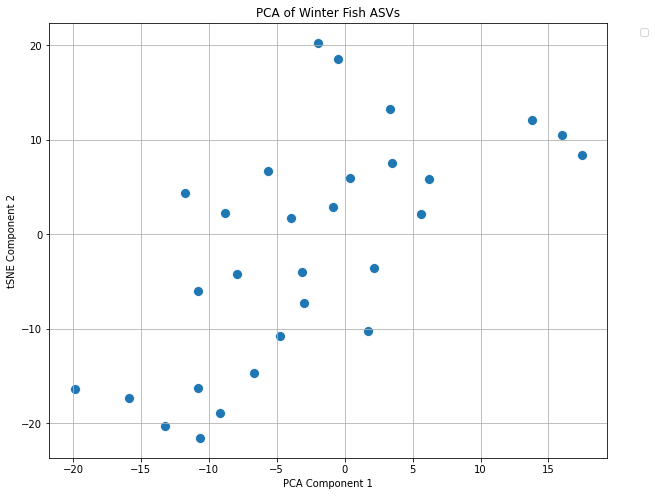

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


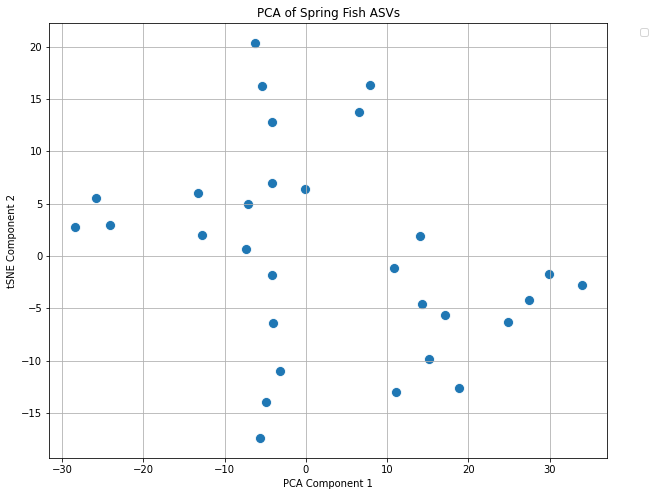

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


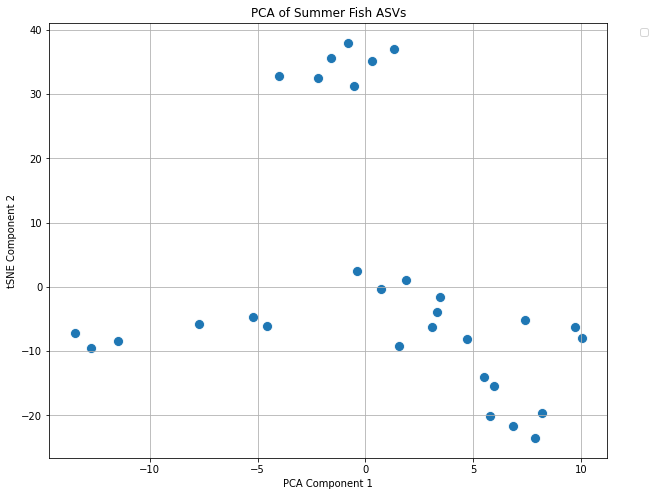

In [32]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=winter_data, s=100, palette='tab10')
plt.title('PCA of Winter Fish ASVs')
plt.xlabel('PCA Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=spring_data, s=100, palette='tab10')
plt.title('PCA of Spring Fish ASVs')
plt.xlabel('PCA Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=summer_data, s=100, palette='tab10')
plt.title('PCA of Summer Fish ASVs')
plt.xlabel('PCA Component 1')
plt.ylabel('tSNE Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [33]:
# # Extract species columns
# columns_to_remove = ['PCA1', 'PCA2', 'tSNE1', 'tSNE2']
# save_data = winter_data.drop(columns=columns_to_remove, errors='ignore')

# species_columns = save_data.columns[data.columns.get_loc("primers") + 1:]

# # Convert relative abundance to presence/absence (1 if > 0, else 0)
# Data_presence = save_data[species_columns].applymap(lambda x: 1 if x > 0 else 0)

# # Export presence/absence data
# Data_presence.to_csv("winter_presence_absence_data.csv", index=False)


In [34]:
# # Extract species columns
# columns_to_remove = ['PCA1', 'PCA2', 'tSNE1', 'tSNE2']
# save_data = spring_data.drop(columns=columns_to_remove, errors='ignore')

# species_columns = save_data.columns[data.columns.get_loc("primers") + 1:]

# # Convert relative abundance to presence/absence (1 if > 0, else 0)
# Data_presence = save_data[species_columns].applymap(lambda x: 1 if x > 0 else 0)

# # Export presence/absence data
# Data_presence.to_csv("spring_presence_absence_data.csv", index=False)

In [22]:
# # Extract species columns
# columns_to_remove = ['PCA1', 'PCA2', 'tSNE1', 'tSNE2']
# save_data = summer_data.drop(columns=columns_to_remove, errors='ignore')

# species_columns = save_data.columns[data.columns.get_loc("primers") + 1:]

# # Convert relative abundance to presence/absence (1 if > 0, else 0)
# Data_presence = save_data[species_columns].applymap(lambda x: 1 if x > 0 else 0)

# # Export presence/absence data
# Data_presence.to_csv("summer_presence_absence_data.csv", index=False)

In [30]:
## EXPORT DATA
winter_data.to_csv('winter_data.csv', index=False)
spring_data.to_csv('spring_data.csv', index=False)
summer_data.to_csv('summer_data.csv', index=False)